## Comparing Classifiers using Heatmaps - Episode 1 

### Classifiers
 - Adaboost
 - Extra Trees
 - K-Nearest Neighbor
 - Logistic Regression
 - Naive Bayes
 - Random Forests
 - Support Vector Machines
 - XGBoost

### Evaluation Metrics
 - Accuracy
 - F1-score
 - Precision
 - Recall
 - Cohen's kappa statistic
 - Matthews correlation coefficient

### Required Python libraries
- Numpy
- Pandas
- Matplotlib
- Seaborn
- Scikit
- XGBoost

### Import Python libraries

In [72]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#classification
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import cohen_kappa_score,matthews_corrcoef


### Read data

In [89]:
#read data directly from a github repository
file_url='https://raw.githubusercontent.com/vappiah/Machine-Learning-Tutorials/main/datasets/malaria_clin_data.csv'

dataframe=pd.read_csv(file_url)



### Data Exploration & Cleaning


In [10]:
#we are interested in the columns : 'Clinical_diagnosis' up to 'RBC_dist_width_Percent'
#meaning we will subset the data from column 16 - the last column

subset=dataframe.iloc[:,16:]


In [11]:
#drop / remove all rows with missing values

subset.dropna(inplace=True)

In [12]:
#get the class

subset['Clinical_Diagnosis'].unique()

array(['Severe Malaria', 'Uncomplicated Malaria', 'Non-malaria Infection'],
      dtype=object)

 
### **Data preprocesing** 
This is done to put the data in an appropriate format before modelling


In [35]:
#we will now seperate the feature values from the class. we do this because scikit-learn requires that features and class are separated before parsing them to the classifiers.

X=subset.iloc[:,1:]
y=subset.iloc[:,0]

\
**Encode labels**

The labels for this data are categorical and we therefore have to convert them to numeric forms. This is referred to as encoding. Machine learning models usually require input data to be in numeric forms, hence we encoding the labels.

In [36]:
#let's encode target labels (y) with values between 0 and n_classes-1.
#encoding will be done using the LabelEncoder

label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

\
**Data Normalization**

In [17]:
# scale data between 0 and 1

In [18]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X=min_max_scaler.fit_transform(X)

\
**Data Splitting**

We will now split the data into training and test subsets.
The training data is initially parsed to the machine learning model. this is to enable the model to identify discriminatory patterns which can be used to make future predictions.
The testing data is used to evaluate the model after the training phase.

In [39]:
#split data into training and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

### Model Training & Evaluation

In [87]:

#model evaluation

def evaluate(model,xtest,ytest,name):
    
    ypred=model.predict(xtest)  

    accuracy=np.round(balanced_accuracy_score(ytest,ypred),4)
    
    precision=np.round(precision_score(ytest,ypred,average = 'weighted'),4)

    recall=np.round(recall_score(ytest,ypred,average = 'weighted'),4)
    
    f1score=np.round(f1_score(ytest,ypred,average = 'weighted'),4)
    
    cohenkappa_score=np.round(cohen_kappa_score(ytest,ypred),4)
 
    matthews_corrcoef_=np.round(matthews_corrcoef(ytest,ypred),4)
    
    return accuracy,precision,recall,f1score,cohenkappa_score,matthews_corrcoef_
    

In [82]:
#model fitting

def fit_data(xtrain,ytrain,xtest,ytest):
    
    #Adaboost Classifier
    ADB=AdaBoostClassifier()
    ADB.fit(xtrain,ytrain)

    #XGBoost Classifier
    XGB=XGBClassifier(num_class=labels.shape,eval_metric='mlogloss',use_label_encoder =False)
    XGB.fit(xtrain,ytrain)
    
    #Random Forest Classifier
    RF=RandomForestClassifier(max_features=0.2)
    RF.fit(xtrain,ytrain)

    #Support Vector Machine Classifier
    SVM=SVC()
    SVM.fit(xtrain,ytrain)

    #K-nearest Neighbor classifier
    KNN=KNeighborsClassifier()
    KNN.fit(xtrain,ytrain)

    #Naive Bayes Classifier
    NB=GaussianNB()
    NB.fit(xtrain,ytrain)

    #Extra Trees Classifier
    ETC=ExtraTreesClassifier()
    ETC.fit(xtrain,ytrain)

    #Logistic Regression
    
    LOGREG =LogisticRegression(C = 50, multi_class = 'multinomial',solver='lbfgs', max_iter=3000)
    LOGREG.fit(xtrain,ytrain)

    #this list will be used to store the scores for all classifiers
    performance_list=[]

    #performance metrics to be used for evaluating the classifiers
    performance_metrics=['accuracy','precision','recall','f1score',
                    'cohen_kappa_score','matthews coefficient']
    indices=[]
	
    #create a dictionary object to store the models
    model_dict={'KNN':KNN,'Random Forest':RF,'LOGREG':LOGREG,'SVM':SVM,'Naive Bayes':NB,
            'XGBoost':XGB,'Extra Trees':ETC,'Adaboost':ADB}

    #evaluate the each model stored in the dictionary object
    for name,model in model_dict.items():
        performance=evaluate(model,xtest,ytest,name)
        performance_list.append(performance)
        indices.append(name)
        performance_frame=pd.DataFrame(performance_list,columns=performance_metrics,index=indices)
    return performance_frame


In [83]:
#fit the models to the training data and evaluate the models
#this is done by calling the functions created in the previous step
#the result is assigned to a variable

result=fit_data(X_train,y_train,X_test,y_test)

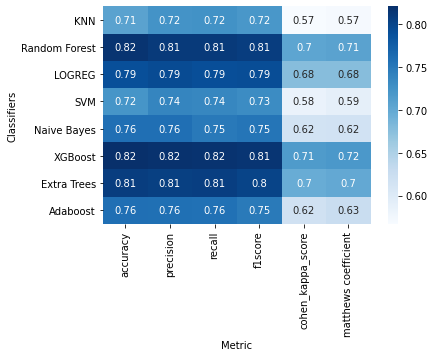

In [88]:
#use seaborn to generate heatmap using the result from the previous step

sns.heatmap(result,annot=True,cmap='Blues')
plt.xlabel('Metric')
plt.ylabel('Classifiers')
result.to_csv('classifiers_performance.csv',index=False)